## DDA3020 Autumn 2023 Homework 1 

### Programming Part 1：Polynomial Regression

student ID: 121090429

--------------------------------------------------------------------------------------------------------------------------

In this exercise, we will try to fit a non-linear function $g$ with polynomial regression on the feasible space $\mathbf{X} = [0,11]$: 
$$\text{Unknown} \quad g(x) = ?$$ 
$$\text{Construct} \quad f(x) = \sum_{i=0}^n \alpha_i x^i \quad \Longleftrightarrow \quad f(x) = w^Tx',\quad x' = \begin{bmatrix} 1\\x\\x^2\\\vdots\\x^n\end{bmatrix},\quad s.t. \quad \forall x\in \mathbf{X}, \quad f(x) \approx g(x) $$ 
Where $n$ is the polynomial degree of freedom and is manually chosen.

--------------------------------------------------------------------------------------------------------------------------

In [10]:
import numpy as np
import matplotlib.pyplot as plt


We will use 17 noised samples to try to construct $f$.

In [11]:
x = np.array([ 0.    ,  0.6875,  1.375 ,  2.0625,  2.75  ,  3.4375,  4.125 , 4.8125,  5.5   ,  6.1875,  6.875 ,  7.5625,  8.25  ,  8.9375, 9.625 , 10.3125, 11.    ])
y = np.array([ -4.4282,   5.3943,   1.2416,  -5.9952,   3.1727,  18.6035, -3.2577,  -4.3593, -14.3989, -41.4483, -41.7916, -16.6214, 33.3262,  66.5037,  87.59  ,  64.3216,  10.4986])

#### 1. (1 point) 

(1) Define the function to calculate $\hat{w}$ directly from $X$, $y$ and $\lambda$:

$$\hat{w} = \arg\min_{w}\|Xw-y\|^2+\lambda\|w\|^2 \quad \Rightarrow\quad \hat{w} = (X^TX+\lambda I)^{-1}X^Ty$$

   - _Hint_: You are allowed to use _np.linalg.inv_ to calculate the inverse of a matrix.


In [12]:
def estimate_w(X,y,lambda_reg):
    cols = X.shape[1]
    est_w = np.dot(np.linalg.inv(np.dot(np.transpose(X),X) + lambda_reg*np.identity(cols)), np.dot(np.transpose(X),y))
    return est_w

#### 2. (3 points)
(1) Take $n = 3$ and $lambda = 0$. Solve the problem.

(2) Display your $\hat{y} = X\hat{w}$ as well as the given $y$. You are supposed to see:

<!-- ![pic1](hw1.png) -->
<img src = 'hw1.png' width = 40% height = 40% />


 - _Hint_: the mean squared error of this solution $\frac{(\hat{y}-y)^2}{17} = 754.55$

mse is: 754.5476782976066


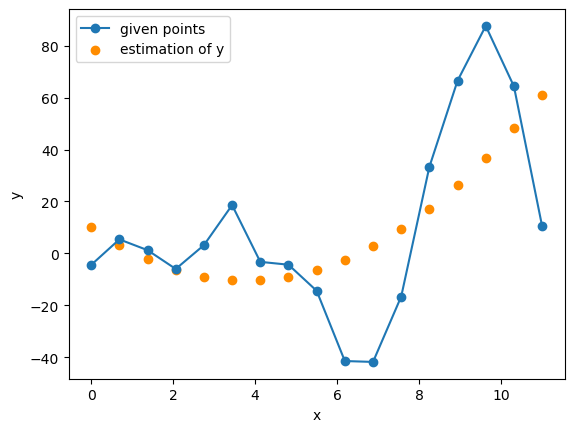

In [13]:
# 2 - (1)
n = 3
lambda_reg = 0.0
N = len(x) # sample size
X = np.zeros((N, n+1)) 


for i in range(N):
    for j in range(n+1):
        x_i = list(x)[i]
        X[i][j] = x_i**(j)

est_w = estimate_w(X,y,lambda_reg)
est_y = np.dot(X,est_w)
mse = np.mean(np.square(est_y-y))
print("mse is:",mse)


# 2 - (2)
plt.plot(x,y,marker='o',label = 'given points')
plt.scatter(x,est_y,marker='o', c='darkorange', label = 'estimation of y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


#### 3. (8 points) 

(1) Implement a grid search by changing the polynomial degree $n$ as well as the regularization parameter $\lambda$

(2) find the best mse (mean squared error) that you can reach. Print your best search mse.

In [14]:
# 3 - (1)
n_set = list(np.arange(0,21,1))
lambda_set = list(np.arange(0,1,0.01)) # lambda belongs to [0,1], here lambda is accurate to two decimal places
mse_list = []
n_list = []
lambda_list = []

for n in n_set:
    for lambda_reg in lambda_set:
        X = np.zeros((N, n+1))
        for i in range(N):
            for j in range(n+1):
                x_i = list(x)[i]
                X[i][j] = x_i**(j)
        est_w = estimate_w(X,y,lambda_reg)
        est_y = np.dot(X,est_w)
        mse = np.mean(np.square(est_y-y))
        mse_list.append(mse)
        n_list.append(n)
        lambda_list.append(lambda_reg)

# 3 - (2)
best_mse = min(mse_list)
best_n = n_list[mse_list.index(best_mse)]
best_lambda = lambda_list[mse_list.index(best_mse)]
print("The best search mse is:",best_mse)
print("The optimal value of n is:",best_n)
print("The optimal value fo lambda is:",best_lambda)

The best search mse is: 21.406190536146422
The optimal value of n is: 10
The optimal value fo lambda is: 0.0


#### 4. (1 point) 

(1) Display in 3D the results of your grid search.

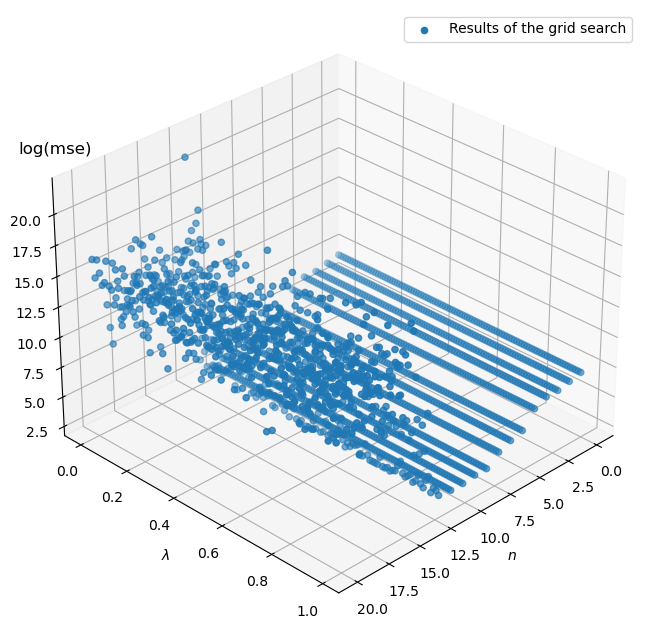

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
x = n_list
y = lambda_list
z = np.log(mse_list)
# To show the change of the mse more clearly, here we use log(mse) as z axis.

ax.view_init(elev=30,azim=45)
ax.scatter(x, y, z, label='Results of the grid search')
ax.set_ylabel("$\lambda$")
ax.set_xlabel("$n$")

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)


ax.text(25, 0, 27, "log(mse)", color='black', fontsize=12)
plt.legend()

#### 5. (1 point) 

(1) Define the function $f$ that you found.


In [16]:
def f(x):  # From the previous grid search, n=10, λ=0.0
    x_sample = np.array([ 0.    ,  0.6875,  1.375 ,  2.0625,  2.75  ,  3.4375,  4.125 , 4.8125,  5.5   ,  6.1875,  6.875 ,  7.5625,  8.25  ,  8.9375, 9.625 , 10.3125, 11.    ])
    y = np.array([ -4.4282,   5.3943,   1.2416,  -5.9952,   3.1727,  18.6035, -3.2577,  -4.3593, -14.3989, -41.4483, -41.7916, -16.6214, 33.3262,  66.5037,  87.59  ,  64.3216,  10.4986])
    N = len(x_sample)
    n = 10
    lambda_reg = 0.0
    X = np.zeros((N, n+1)) 
    for i in range(N):
        for j in range(n+1):
            x_i = list(x_sample)[i]
            X[i][j] = x_i**(j)

    est_w = estimate_w(X,y,lambda_reg)
    x_prime = np.transpose(np.zeros(n+1))
    for i in range(n+1):
        x_prime[i] = x**(i)

    function_value = np.dot(x_prime,est_w)
    return function_value

#### 5. (6 points) 

(1) Load the 1000 points taken from the ground truth fuction $g$. You will find data on the range $x\in[-5,20]$.

(2) Display for $x\in [0,11]$:
 - Display $g$ in color 'C0' with the points that you loaded.
 - Scatter the given 17 samples in color 'C1'. 
 - Display (enough densely) your $f$ in color 'C2'.
 - Display the legend indicating the 3 plots. Specify the name for axis x and y.

(3) Repeat (2) for $x\in [-1,12]$

(4) Repeat (2) for $x\in [-2,13]$

(5) Give some comments on this work.

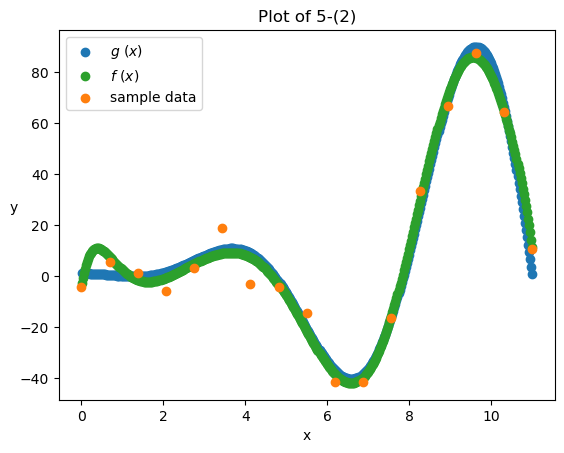

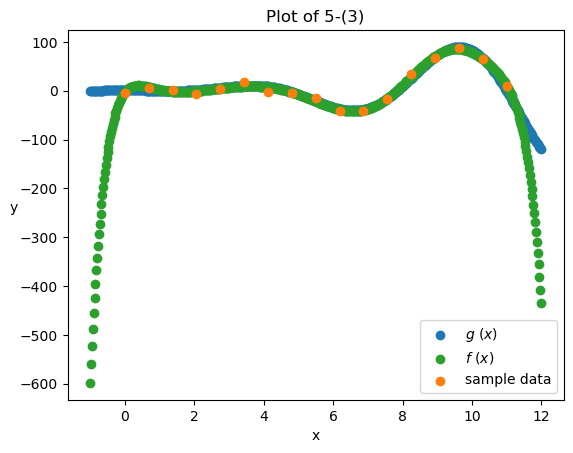

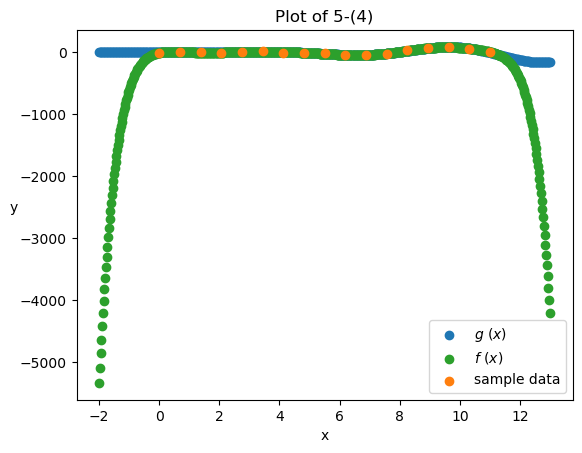

In [17]:
# 5 - (1) load
import pickle as pkl
with open('ground truth function', 'rb') as read_file:
    x_real_g, y_real_g = pkl.load(read_file)
    read_file.close()

x_sample = np.array([ 0.    ,  0.6875,  1.375 ,  2.0625,  2.75  ,  3.4375,  4.125 , 4.8125,  5.5   ,  6.1875,  6.875 ,  7.5625,  8.25  ,  8.9375, 9.625 , 10.3125, 11.    ])
y_sample = np.array([ -4.4282,   5.3943,   1.2416,  -5.9952,   3.1727,  18.6035, -3.2577,  -4.3593, -14.3989, -41.4483, -41.7916, -16.6214, 33.3262,  66.5037,  87.59  ,  64.3216,  10.4986])

# 5 - (2)
x_2 = []
g_2 = []
f_2 = []

for x, y in zip(x_real_g, y_real_g):
    if 0 <= x <= 11:
        x_2.append(x)
        g_2.append(y)
        
for x in x_2:
    f_2.append(f(x))


plt.scatter(x_2,g_2,color='C0',label = '$g \ (x)$')
plt.scatter(x_2,f_2,color='C2',label='$f \ (x)$')
plt.scatter(x_sample,y_sample,color='C1',label = 'sample data')
plt.xlabel('x')
plt.ylabel('y',rotation = 0)
plt.title('Plot of 5-(2)')
plt.legend()
plt.show()

# 5 - (3)
x_3 = []
g_3 = []
f_3 = []

for x, y in zip(x_real_g, y_real_g):
    if -1 <= x <= 12:
        x_3.append(x)
        g_3.append(y)
        
for x in x_3:
    f_3.append(f(x))


plt.scatter(x_3,g_3,color='C0',label = '$g \ (x)$')
plt.scatter(x_3,f_3,color='C2',label='$f \ (x)$')
plt.scatter(x_sample,y_sample,color='C1',label = 'sample data')
plt.xlabel('x')
plt.ylabel('y',rotation = 0)
plt.title('Plot of 5-(3)')
plt.legend()
plt.show()

# 5 - (4)
x_4 = []
g_4 = []
f_4 = []

for x, y in zip(x_real_g, y_real_g):
    if -2 <= x <= 13:
        x_4.append(x)
        g_4.append(y)
        
for x in x_4:
    f_4.append(f(x))
    

plt.scatter(x_4,g_4,color='C0',label = '$g \ (x)$')
plt.scatter(x_4,f_4,color='C2',label='$f \ (x)$')
plt.scatter(x_sample,y_sample,color='C1',label = 'sample data')
plt.xlabel('x')
plt.ylabel('y',rotation = 0)
plt.title('Plot of 5-(4)')
plt.legend()
plt.show()

comments:

1. The grid search indicates that $\lambda = 0.0, n=10$.

2. The fitted result of $f$ is very good when $x \in [0,11]$; when $x \le 0$ or $x \ge 11$, the fitted results deviate from the true value $g$.

3. $g(x)$ tends to converge to 0 as $x$ decreases when $x \in [-5,0]$.

4. $g(x)$ tends to converge to 0 as $x$ increases when $x \in [11,20]$.